<a href="https://colab.research.google.com/github/muku1999/Prescription-Label-Reading/blob/main/Prescription_Label_Reading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries and Dependencies

In [1]:
# Installing PaddlePaddle Library
!pip install paddlepaddle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.5/385.5 KB 26.7 MB/s eta 0:00:00


In [2]:
# Installing Paddle OCR
!pip install "paddleocr>=2.0.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.6/440.6 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 32.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 KB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [3]:
# Google Text-to-Speech library to convert our texts to speech
!pip install gTTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 294.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 5.3 MB/s eta 0:00:00
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
flask 1.1.4 requires click<8.0,>=5.1, but you have c

In [4]:
# cloning paddle OCR repo - for fonts and visualization
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 45302, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 45302 (delta 47), reused 52 (delta 19), pack-reused 45193
Receiving objects: 100% (45302/45302), 338.40 MiB | 23.63 MiB/s, done.
Resolving deltas: 100% (31938/31938), done.
Checking out files: 100% (1620/1620), done.


In [5]:
# importing imp. libraries
# paddleocr - for model instantiate , draw_ocr - for visualization of our result
from paddleocr import PaddleOCR,draw_ocr
import matplotlib.pyplot as plt
import cv2
import os

## Instantiating the model and Making Detection


In [6]:
# model setup - selecting english as the language
ocr = PaddleOCR(lang ='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:08<00:00, 487kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:09<00:00, 1.01MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:07<00:00, 296kiB/s]

[2023/01/15 18:16:09] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set

In [7]:
# getting the image file directory
img_path = os.path.join('.','drug1.jpg')

In [8]:
# making detection
result = ocr.ocr(img_path)

[2023/01/15 18:16:10] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/01/15 18:16:10] ppocr DEBUG: dt_boxes num : 6, elapse : 0.27742981910705566
[2023/01/15 18:16:11] ppocr DEBUG: rec_res num  : 6, elapse : 0.5199108123779297


In [9]:
result[0]

[[[[218.0, 181.0], [228.0, 177.0], [232.0, 186.0], [222.0, 190.0]],
  ('Rx', 0.557673454284668)],
 [[[219.0, 199.0], [288.0, 202.0], [288.0, 216.0], [218.0, 214.0]],
  ('S0 MCG TABLETS', 0.8884426951408386)],
 [[[217.0, 218.0], [337.0, 215.0], [338.0, 232.0], [218.0, 235.0]],
  ('TAKE ONE TABLET BY', 0.9609463214874268)],
 [[[219.0, 232.0], [285.0, 234.0], [285.0, 249.0], [218.0, 246.0]],
  ('EVERY DAY', 0.942968487739563)],
 [[[219.0, 257.0], [254.0, 260.0], [253.0, 274.0], [218.0, 272.0]],
  ('QTY:90', 0.9474542737007141)],
 [[[218.0, 289.0], [293.0, 293.0], [292.0, 306.0], [217.0, 303.0]],
  ('OF:12-012019', 0.8215625882148743)]]

In [10]:
# box coords 
result[0][0]

[[[218.0, 181.0], [228.0, 177.0], [232.0, 186.0], [222.0, 190.0]],
 ('Rx', 0.557673454284668)]

In [11]:
result[0][0][1][0]

'Rx'

In [12]:
for res in result[0]:
  print(res[1][0])

Rx
S0 MCG TABLETS
TAKE ONE TABLET BY
EVERY DAY
QTY:90
OF:12-012019


In [13]:
for res in result[0]:
  print(res[1][1])

0.557673454284668
0.8884426951408386
0.9609463214874268
0.942968487739563
0.9474542737007141
0.8215625882148743


## Visualize the results

In [14]:
# extracting texts and other features
boxes = [res[0] for res in result[0]]
texts = [res[1][0] for res in result[0]]
scores = [res[1][1] for res in result[0]]


In [15]:
scores,texts,boxes

([0.557673454284668,
  0.8884426951408386,
  0.9609463214874268,
  0.942968487739563,
  0.9474542737007141,
  0.8215625882148743],
 ['Rx',
  'S0 MCG TABLETS',
  'TAKE ONE TABLET BY',
  'EVERY DAY',
  'QTY:90',
  'OF:12-012019'],
 [[[218.0, 181.0], [228.0, 177.0], [232.0, 186.0], [222.0, 190.0]],
  [[219.0, 199.0], [288.0, 202.0], [288.0, 216.0], [218.0, 214.0]],
  [[217.0, 218.0], [337.0, 215.0], [338.0, 232.0], [218.0, 235.0]],
  [[219.0, 232.0], [285.0, 234.0], [285.0, 249.0], [218.0, 246.0]],
  [[219.0, 257.0], [254.0, 260.0], [253.0, 274.0], [218.0, 272.0]],
  [[218.0, 289.0], [293.0, 293.0], [292.0, 306.0], [217.0, 303.0]]])

In [16]:
# Specifying font path 
font_path = os.path.join('/content/PaddleOCR/doc/fonts/', 'latin.ttf')

In [17]:
# importing our images
img = cv2.imread(img_path)
# change the image from BGR to RGB format
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

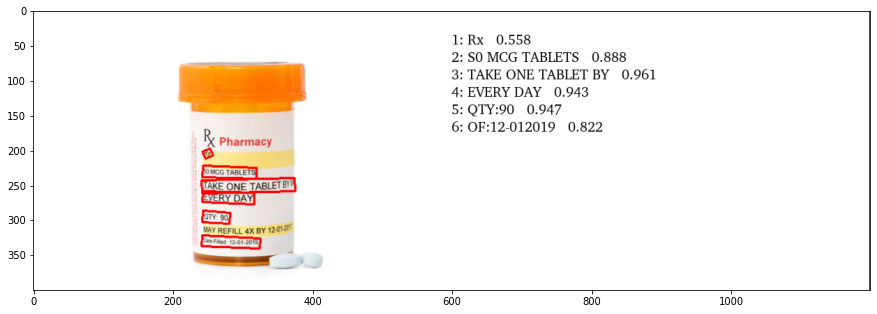

In [18]:
# Visualization
plt.figure(figsize= (15,15))
# draw annotation on images
annotation = draw_ocr(img, boxes,texts,scores,font_path = font_path )
plt.imshow(annotation)

In [19]:
print(texts)

['Rx', 'S0 MCG TABLETS', 'TAKE ONE TABLET BY', 'EVERY DAY', 'QTY:90', 'OF:12-012019']


In [20]:
# combining all the texts together
txt =' '.join(texts)
txt

'Rx S0 MCG TABLETS TAKE ONE TABLET BY EVERY DAY QTY:90 OF:12-012019'

In [21]:
# storing text results in a .txt file
txt_file=open("result.txt","w")
txt_file.write(txt)

66

In [22]:
# to convert text to speech
from gtts import gTTS

In [24]:
# open the text file
txt_file =open("result.txt","r")
# read the file
t2s= txt_file.read()
tt= gTTS(text=t2s,lang='en',slow = False)
# saving the speech file in a mp3
tt.save("txt2speech.mp3")

In [25]:
# using gradio to create a webpage
!pip install gradio
import gradio 
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 KB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [26]:
file = open('model.pkl', 'wb')

pickle.dump(tt, file)

In [27]:
# to extract text from pdf
!pip install pdfminer.six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 71.7 MB/s eta 0:00:00


In [28]:
from pdfminer.high_level import extract_text
import gradio

def pdf_to_text(file_obj):
   text = extract_text(file_obj.name)
   myobj = gTTS(text=t2s, lang='en', slow=False)
   myobj.save("result.wav")
   return 'result.wav'

iface = gradio.Interface(
   fn = pdf_to_text,
   inputs = 'file',
   outputs = 'audio'
   )
iface.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>